# Identifikasi Tujuan Berpergian Penduduk Berdasarkan Data Twitter Menggunakan Metode Geoparsing

## Persiapan Module

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

## Pemerosesan Data
Membaca Data

In [99]:
data_twitter = pd.read_csv("data/twitter_mining_csv.csv", encoding= 'unicode_escape')
tweet = data_twitter['tweet']
tweet.head()

0    @thereds_28 PSIM lolos lah, away skalian mudik...
1    @thereds_28 PSIM lolos lah, away skalian mudik...
2    orang dari sumatra yang pindah ke jawa biasany...
3    Polres Purbalingga akan mendata siapa saja yan...
4                                  Mudik ke Surabaya. 
Name: tweet, dtype: object

Mengidentifikasi nama tempat pada setiap tweet menggunaakan module geoText dimana module tersebut akan mendeteksi suatu wilayah pada tinggkat kota pada suatu kalimat

In [136]:
tempat = []
tempatAll = []
x = range(10)
for n in range(len(tweet.index)):
    s1 = str( tweet[n])
    places = GeoText(s1)
    tempatAll.append(places.cities)
    if places.cities != []:
        for city in places.cities:
            tempat.append(city)    
tempat

['Purbalingga',
 'Purbalingga',
 'Surabaya',
 'Makassar',
 'Palembang',
 'Pekanbaru',
 'Pekalongan',
 'Sragen',
 'Semarang',
 'Sukabumi',
 'Makassar',
 'Bali',
 'Makassar',
 'Surabaya',
 'Yogyakarta',
 'Sragen',
 'Bunda',
 'Sibolga',
 'Aku',
 'Bulan',
 'Bangil',
 'Busan',
 'Blora',
 'Ungaran',
 'Ungaran',
 'Incheon',
 'Sibolga',
 'Moga',
 'Bekasi',
 'Bandung',
 'Cirebon',
 'Lembang',
 'Banyuwangi',
 'Kapan',
 'Jember',
 'Bali',
 'Bandung',
 'Bandung',
 'Jakarta',
 'Aku']

Mendapatkan data koordinat berdasarkan nama kota yang telah diidentifikasi menggunakan module geopy 

In [138]:
geolocator = Nominatim(user_agent="tausan21@gmail.com",timeout=2)
lat_lon = []
for kota in tempat: 
    try:
        location = geolocator.geocode(kota)
        if location:
            lat_lon.append(location)
    except GeocoderTimedOut as e:
            print("error" ,e)
lat_lon

[Location(Purbalingga, Jawa Tengah, Indonesia, (-7.32733005, 109.39989874266684, 0.0)),
 Location(Purbalingga, Jawa Tengah, Indonesia, (-7.32733005, 109.39989874266684, 0.0)),
 Location(Surabaya, Jawa Timur, Indonesia, (-7.2459717, 112.7378266, 0.0)),
 Location(Makassar, Sulawesi Selatan, Indonesia, (-5.1342962, 119.4124282, 0.0)),
 Location(Palembang, Sumatera Selatan, Indonesia, (-2.9888297, 104.756857, 0.0)),
 Location(Pekanbaru, Kabupaten Kampar, Riau, 28141, Indonesia, (0.5262455, 101.4515727, 0.0)),
 Location(Pekalongan, Jawa Tengah, Indonesia, (-7.0424390500000005, 109.61916069886243, 0.0)),
 Location(Sragen, Jawa Tengah, Indonesia, (-7.3924563, 110.95302317792749, 0.0)),
 Location(Semarang, Jawa Tengah, Indonesia, (-6.9903988, 110.4229104, 0.0)),
 Location(Sukabumi, Jawa Barat, 43111, Indonesia, (-6.9199289, 106.9265095, 0.0)),
 Location(Makassar, Sulawesi Selatan, Indonesia, (-5.1342962, 119.4124282, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.858

In [141]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Purbalingga, Jawa Tengah, Indonesia","(-7.32733005, 109.39989874266684)"
1,"Purbalingga, Jawa Tengah, Indonesia","(-7.32733005, 109.39989874266684)"
2,"Surabaya, Jawa Timur, Indonesia","(-7.2459717, 112.7378266)"
3,"Makassar, Sulawesi Selatan, Indonesia","(-5.1342962, 119.4124282)"
4,"Palembang, Sumatera Selatan, Indonesia","(-2.9888297, 104.756857)"
5,"Pekanbaru, Kabupaten Kampar, Riau, 28141, Indo...","(0.5262455, 101.4515727)"
6,"Pekalongan, Jawa Tengah, Indonesia","(-7.0424390500000005, 109.61916069886243)"


Menggubah data koordinat menjadi bentuk feature supaya dapat di plot ke dalam peta

In [140]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

Menambahkan bentuk geometri ke dalam dataframe sehingga menjadi geodataframe

In [142]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Purbalingga, Jawa Tengah, Indonesia","(-7.32733005, 109.39989874266684)",POINT (109.39990 -7.32733)
1,"Purbalingga, Jawa Tengah, Indonesia","(-7.32733005, 109.39989874266684)",POINT (109.39990 -7.32733)
2,"Surabaya, Jawa Timur, Indonesia","(-7.2459717, 112.7378266)",POINT (112.73783 -7.24597)
3,"Makassar, Sulawesi Selatan, Indonesia","(-5.1342962, 119.4124282)",POINT (119.41243 -5.13430)
4,"Palembang, Sumatera Selatan, Indonesia","(-2.9888297, 104.756857)",POINT (104.75686 -2.98883)


## Hasil

Tujuan berpergian masyarakat ke luar dan dalam negeri

<AxesSubplot:>

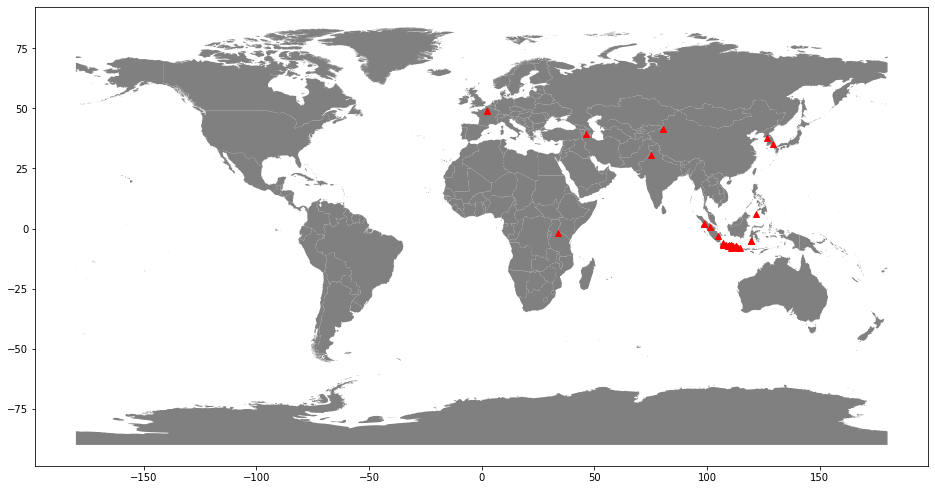

In [143]:
countries_map =gpd.read_file('data/shp/World_Countries.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=1, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 35,color = 'r', marker = '^', alpha=1)

Tujuan berpergian masyarakat ke dalam negeri

(-11.00214, 5.9072)

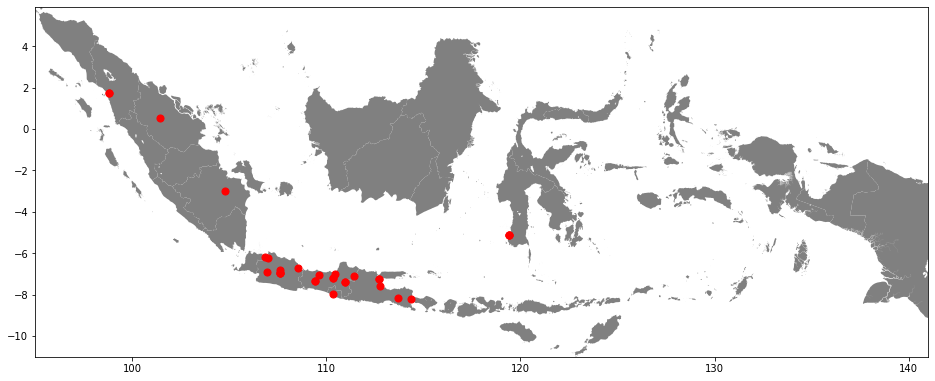

In [145]:
indonesia_map =gpd.read_file('data/shp/INDONESIA_PROP.shp')

f, ax = plt.subplots(figsize=(16, 16))
indonesia_map.plot(ax=ax, alpha=1, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 50,color = 'r', marker = 'o', alpha=1)

minx, miny, maxx, maxy = indonesia_map.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [163]:
df = df.groupby(['City Name']).count()
df.head()

,Coordinates,geometry
City Name,,
"Bandung, Jawa Barat, Indonesia",1,1
"Bangil, Jalan Gajah Mada, Bangil, Pasuruan, Jawa Timur, 67153, Indonesia",1,1
"Banyuwangi, Jawa Timur, Indonesia",1,1
"Bekasi, Jawa Barat, 17136, Indonesia",1,1
"Blora, Jawa Tengah, 58211 - 58219, Indonesia",1,1


Daerah yang paling banyak di kunjungi

<AxesSubplot:xlabel='City Name'>

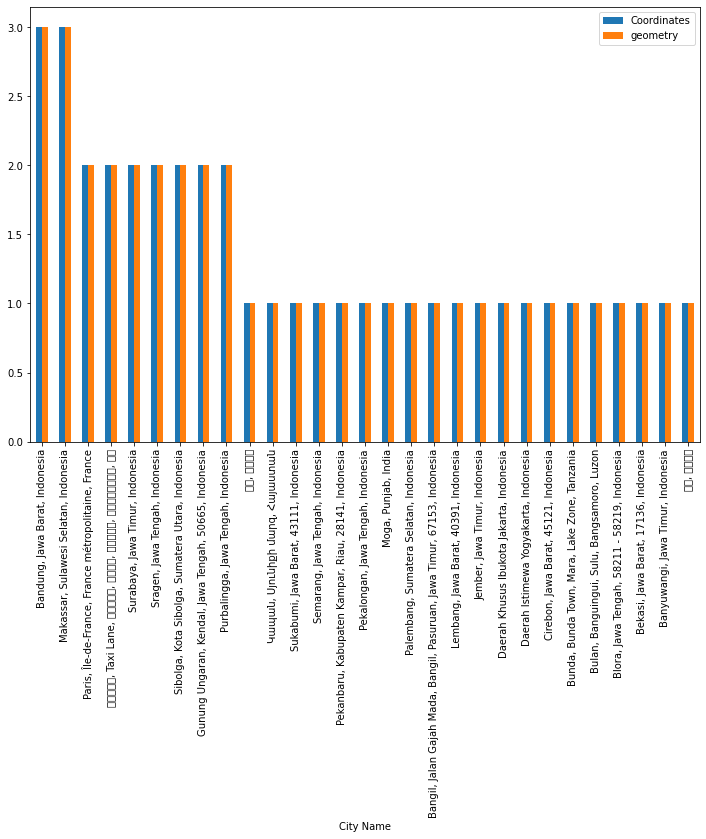

In [162]:
df.sort_values('Coordinates', ascending=False).plot.bar(rot=90,figsize=(12,8))

## Uji akurasi

In [77]:
tweet.head()

0    @thereds_28 PSIM lolos lah, away skalian mudik...
1    @thereds_28 PSIM lolos lah, away skalian mudik...
2    orang dari sumatra yang pindah ke jawa biasany...
3    Polres Purbalingga akan mendata siapa saja yan...
4                                  Mudik ke Surabaya. 
Name: tweet, dtype: object

In [153]:
tweetCek = pd.DataFrame({"tweet": "","nama_kota_deteksi":"","Nama_kota_seharusnya":"","sesuai":""}, index=[0])
samplingcek = [[],[],[],["Purbalingga","Purbalingga"],["Surabaya"],["Makassar"],[],[],["Palembang"],["pati"]]
for x in range(10):
    if tempatAll[x] == samplingcek[x]:
        tweetCek.loc[x] = [tweet[x],tempatAll[x],samplingcek[x],"Sesuai"]
    else:
        tweetCek.loc[x] = [tweet[x],tempatAll[x],samplingcek[x],"Tidak Sesuai"]
tweetCek

C:\Users\lenovo\miniconda3\envs\datascience\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,tweet,nama_kota_deteksi,Nama_kota_seharusnya,sesuai
0,"@thereds_28 PSIM lolos lah, away skalian mudik...",[],[],Sesuai
1,"@thereds_28 PSIM lolos lah, away skalian mudik...",[],[],Sesuai
2,orang dari sumatra yang pindah ke jawa biasany...,[],[],Sesuai
3,Polres Purbalingga akan mendata siapa saja yan...,"[Purbalingga, Purbalingga]","[Purbalingga, Purbalingga]",Sesuai
4,Mudik ke Surabaya.,[Surabaya],[Surabaya],Sesuai
5,Mie Hengky...dehh andalanG ini klo Mudik ke Ma...,[Makassar],[Makassar],Sesuai
6,Jadi keinget twit kapan hari...,[],[],Sesuai
7,NaN,[],[],Sesuai
8,Malah disuruh mudik ke Palembang,[Palembang],[Palembang],Sesuai
9,Jalurku kalo aku mudik .. ke pati lewat banget...,[],[pati],Tidak Sesuai


Dari uji tersebut dapat dilihat bahwa dari 10 sample terdapat 9 sample yang sesuai dan 1 sampel yang tidak sesuai sehingga akurasi dari geotext adalah 90%